In [ ]:
# genera un numero reale in un intervallo tra due numeri reali con un simulatore reale

from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit, transpile
import matplotlib.pyplot as plt
import numpy as np
from qiskit_ibm_runtime.fake_provider import FakeFez
import math
from qiskit.quantum_info import Statevector

# input
a = float(input('inserisci l\'estremo sx dell\'intervallo\' (reale) : \n'))
b = float(input('inserisci l\'estremo dx dell\'intervallo\'(reale) : \n'))
d = float(input('inserisci l\'errore massimo desiderato ( < b-a ) : \n'))

num_bit = math.ceil(math.log2((b-a)/d+1))
p = [(1/2)**i for i in range(1,num_bit+1)] 

# creazione del circuito
qc = QuantumCircuit(num_bit)
for i in range(num_bit) : # i = riga del circuito
    qc.h(i)

# statevector
state = Statevector.from_instruction(qc) 
print("Statevector:", state) # Print the statevector
probs = state.probabilities_dict() # Get the probabilities of each state
plot_histogram(probs)
plt.show()

qc.measure_all()
print(qc)

simulator = FakeFez()
qc_transpiled = transpile(qc,simulator)
print(qc_transpiled)

        ┌───┐ ░ ┌─┐            
   q_0: ┤ H ├─░─┤M├────────────
        ├───┤ ░ └╥┘┌─┐         
   q_1: ┤ H ├─░──╫─┤M├─────────
        ├───┤ ░  ║ └╥┘┌─┐      
   q_2: ┤ H ├─░──╫──╫─┤M├──────
        ├───┤ ░  ║  ║ └╥┘┌─┐   
   q_3: ┤ H ├─░──╫──╫──╫─┤M├───
        ├───┤ ░  ║  ║  ║ └╥┘┌─┐
   q_4: ┤ H ├─░──╫──╫──╫──╫─┤M├
        └───┘ ░  ║  ║  ║  ║ └╥┘
meas: 5/═════════╩══╩══╩══╩══╩═
                 0  1  2  3  4 
global phase: 5π/4
          ┌─────────┐┌────┐┌─────────┐ ░ ┌─┐            
 q_0 -> 4 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░─┤M├────────────
          ├─────────┤├────┤├─────────┤ ░ └╥┘┌─┐         
q_1 -> 23 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░──╫─┤M├─────────
          ├─────────┤├────┤├─────────┤ ░  ║ └╥┘      ┌─┐
q_4 -> 56 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░──╫──╫───────┤M├
          ├─────────┤├────┤├─────────┤ ░  ║  ║    ┌─┐└╥┘
q_3 -> 84 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░──╫──╫────┤M├─╫─
          ├─────────┤├────┤├─────────┤ ░  ║  ║ ┌─┐└╥┘ ║ 
q_2 -> 96 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░──╫──╫─┤M├─╫

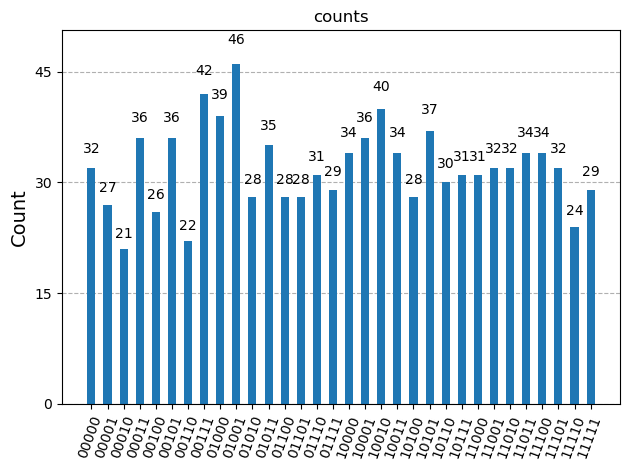

DescribeResult(nobs=np.int64(32), minmax=(np.int64(21), np.int64(46)), mean=np.float64(32.0), variance=np.float64(30.387096774193548), skewness=np.float64(0.2876179388741463), kurtosis=np.float64(0.18476746859237014))
numero casuale reale tra 0.0 e 13.0: 12.161290322580644


In [3]:
%matplotlib inline

shots = 1024
result = simulator.run(qc_transpiled, shots=shots).result()
# per verificare che sia equiprobabile facciamo tanti shots
counts = result.get_counts()
plot_histogram(counts, title='counts')
plt.show()
# analisi statistica di counts.values() : 
valori_int = [int(v) for v in counts.values()]
import scipy
print(scipy.stats.describe(valori_int))

# risultato della misurazione
bit_string = list(result.get_counts().keys())[0] # key -> lista con un solo elemento che è una stringa -> ne prendo il primo elemento che è una stringa
numero_binario = [int(b) for b in bit_string] # stringa -> lista di interi (non posso farlo in place perchè stringa è immutabile)
# per ottenere numero reale nell'intervallo [0,sum(p)]
numero_reale = np.dot(p, numero_binario)
# riportiamo nell'intervallo (a,b)
numero_reale = (numero_reale * 1/sum(p))*(b-a) #da qui otteniamo un numero con tante cifre decimali per via di *1/sum(p)
numero_reale = numero_reale+a
print(f'numero casuale reale tra {a} e {b}: {numero_reale}')